In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_image = train_images/255.0
test_image = test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

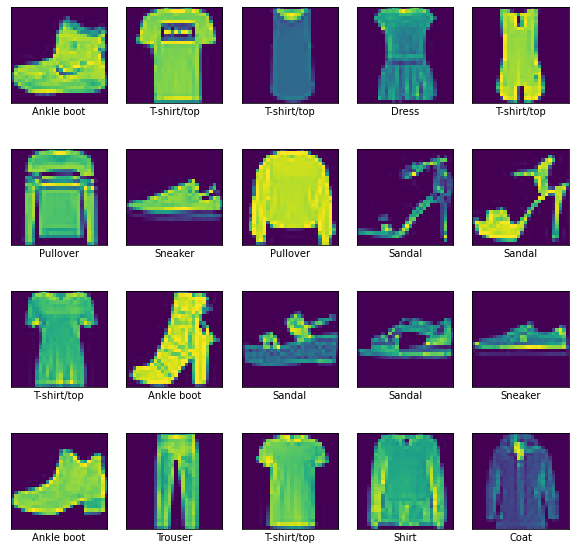

In [16]:
#example
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 778us/step - loss: 3.3630 - accuracy: 0.6984
Epoch 2/20
1875/1875 [==============================] - 1s 786us/step - loss: 0.6530 - accuracy: 0.7607
Epoch 3/20
1875/1875 [==============================] - 1s 765us/step - loss: 0.5866 - accuracy: 0.7964
Epoch 4/20
1875/1875 [==============================] - 1s 761us/step - loss: 0.5325 - accuracy: 0.8147
Epoch 5/20
1875/1875 [==============================] - 2s 909us/step - loss: 0.5227 - accuracy: 0.8211
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5012 - accuracy: 0.8295
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4951 - accuracy: 0.8308
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4878 - accuracy: 0.8349
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4771 - accuracy: 0.8376
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - l

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
history.history['accuracy']

313/313 - 0s - loss: 212.4834 - accuracy: 0.0825

Test accuracy: 0.08250000327825546


[0.6984166502952576,
 0.7607499957084656,
 0.7963500022888184,
 0.8146666884422302,
 0.8211333155632019,
 0.8294666409492493,
 0.8307666778564453,
 0.8349166512489319,
 0.8376166820526123,
 0.8384666442871094,
 0.8380500078201294,
 0.8403000235557556,
 0.8429499864578247,
 0.8424333333969116,
 0.8418833613395691,
 0.8444166779518127,
 0.8438500165939331,
 0.8450333476066589,
 0.8443666696548462,
 0.8452333211898804]

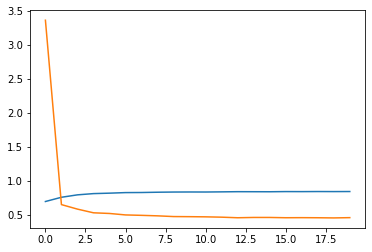

In [10]:
plt.plot(range(20),history.history['accuracy'])
plt.plot(range(20),history.history['loss'])
plt.show()

In [21]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


In [22]:
predictions[1]
np.argmax(predictions[0])

0

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

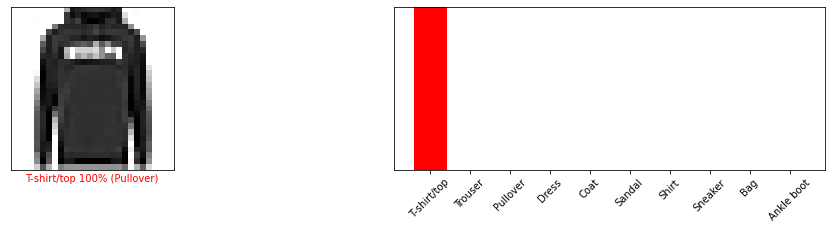

In [25]:
i = 87
plt.figure(figsize=(17,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()